In [1]:
import functions as f
import parameters as p
import run_statistics as stats
import train_network

import numpy as np
import pandas as pd

import network
import os

Device: cuda
-- Data Parameters --
using Resolution: 224
using # actions: 25
-- Training Parameters --
using training data: E:\ILSVRC2017\10classesfirst\nofoveation\train
using test data: E:\ILSVRC2017\10classesfirst\nofoveation\test
using q-table for training data: Q_tables\Q_table_strongfoveated_first10.csv
using q-table for test data: Q_tables\Q_table_strongfoveated_first10.csv
using batch size: 32
using # epochs: 150


In [2]:
paths = os.listdir(p.CHECKPOINT_DIR)
print(paths)

['01-02-2020 default second data', '04-02-2020 10classesfirst', '06-02-2020 10classessecond', '31-01-2020 default']


In [3]:
m = network.DQN(p.RESOLUTION, p.RESOLUTION, p.N_ACTIONS)
m.to(p.DEVICE)
loader_test, idx_to_class = f.loader(p.DATA_PATH_TEST, transform=p.TRANSFORM, batch_size=p.BATCH_SIZE, shuffle=False)


In [4]:
def process_run(m, path):
    run = f.Run(p.CHECKPOINT_DIR + '\\{}'.format(path))
    run.plot_loss()
    print(run.lowest_validation(10))

#     start_epoch, m = f.load_checkpoint(run.get_checkpoint(str(run.lowest_validation(10).index[1])), m)
    start_epoch, m = f.load_checkpoint(run.get_checkpoint(str(100)), m)
    m.eval()
    #random_losses = stats.generate_random(idx_to_class, loader_test)
    #predicted_losses, target_losses, center_locations = stats.generate_predictions(idx_to_class, loader_test, m)
    #stats.print_results(predicted_losses, target_losses)
    train_network.validate_model(m, loader_test, idx_to_class)

using: E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\04-02-2020 10classesfirst 
 reading results from E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\04-02-2020 10classesfirst\results.txt


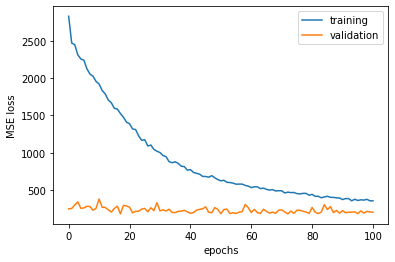

    validation     training
17  177.976398  1525.930579
72  178.946350   470.583957
50  181.136615   622.271702
95  182.373733   358.373200
82  183.038114   415.128716
53  183.300663   599.219113
63  183.884571   517.096924
79  184.223373   429.089597
55  184.674920   577.092212
74  184.987023   465.781173


  0%|                                                                                   | 0/32 [00:00<?, ?it/s]

loading checkpoint
validating ...


100%|██████████████████████████████████████████████████████████████████████████| 32/32 [00:22<00:00,  1.43it/s]

running [validation] loss over 32 batches 199.4476078298868
actions: [(2, 1), (5, 24), (6, 190), (7, 317), (8, 13), (10, 90), (11, 183), (12, 99), (13, 16), (15, 20), (16, 16), (17, 9), (18, 15), (20, 1), (22, 1), (23, 5)]

 === predicted vs target ===
Better performance of the network then center on the 1000 test images: 47.1%
Equal performance of the network then center on the 1000 test images: 9.9%
Worse performance of the network then center on the 1000 test images: 43.0%
WilcoxonResult(statistic=180376.0, pvalue=0.003524200274283165)
WilcoxonResult(statistic=180376.0, pvalue=0.0017621001371415825)


In [5]:
process_run(m, paths[1])

In [6]:
random_losses = stats.generate_random(idx_to_class, loader_test)
predicted_losses, target_losses, center_locations = stats.generate_predictions(idx_to_class, loader_test, m)

losses = pd.DataFrame([np.array(target_losses), np.array(predicted_losses), np.array(random_losses)]).transpose()
losses.columns = ['target', 'predicted', 'random']
losses = losses.sort_values('target')
losses = losses.reset_index(drop=True)



  0%|                                                                                   | 0/30 [00:00<?, ?it/s]

generating 30 random samples ... 



  0%|                                                                                   | 0/32 [00:00<?, ?it/s]

generating 30 random samples done
generating predictions ... 



100%|██████████████████████████████████████████████████████████████████████████| 32/32 [00:15<00:00,  2.01it/s]

generating predictions done


In [7]:
losses

,target,predicted,random
0,0.000195,0.000504,0.063017
1,0.000532,1.650514,1.202773
2,0.000629,0.000454,0.349752
3,0.000647,0.030438,0.532361
4,0.000704,0.000383,0.059003
...,...,...,...
995,12.996223,7.827698,9.126844
996,13.172338,9.679245,8.300001
997,13.587446,7.708899,7.562133
998,14.656813,13.796965,12.356037


In [8]:
stats.print_results(losses['predicted'], losses['target'], losses['random'])


 === predicted vs target ===
Better performance of the network then center on the 1000 test images: 47.1%
Equal performance of the network then center on the 1000 test images: 9.9%
Worse performance of the network then center on the 1000 test images: 43.0%
WilcoxonResult(statistic=180376.0, pvalue=0.003524200274283165)
WilcoxonResult(statistic=180376.0, pvalue=0.0017621001371415825)

 === random vs target ===
Better performance of the network then center on the 1000 test images: 22.8%
Equal performance of the network then center on the 1000 test images: 0.0%
Worse performance of the network then center on the 1000 test images: 77.2%
WilcoxonResult(statistic=83166.0, pvalue=1.0048093040732157e-74)
WilcoxonResult(statistic=417334.0, pvalue=1.0)

 === predicted vs random ===
Better performance of the network then center on the 1000 test images: 80.1%
Equal performance of the network then center on the 1000 test images: 0.0%
Worse performance of the network then center on the 1000 test im